In [1]:
import pandas as pd 
import numpy as np 
from visual import visualize
import torch 
from envs import Env
from trainer import Trainer


In [2]:
df = pd.read_pickle('/Users/admin/Downloads/Machine learning/neural_CO/Bin_packing/OnlineBPP_Tree/Data/data.pkl')

[[16, 4, 34], [32, 4, 19], [32, 4, 50], [5, 26, 50], [33, 13, 16], [54, 3, 50], [49, 26, 7], [32, 17, 17], [16, 33, 20], [32, 18, 19], [38, 37, 9], [32, 22, 19], [21, 13, 50], [32, 14, 37], [3, 26, 43], [28, 26, 6], [7, 26, 43], [11, 26, 36], [5, 37, 35], [33, 7, 35], [33, 30, 14], [28, 26, 8], [33, 13, 34], [32, 17, 19], [32, 13, 31], [16, 31, 31], [16, 31, 31], [16, 33, 14], [28, 26, 22], [29, 4, 21], [4, 30, 21], [29, 26, 21], [16, 37, 16], [32, 17, 14], [32, 14, 13], [39, 26, 7], [38, 37, 6], [33, 20, 1], [1, 33, 22], [34, 1, 40], [33, 20, 5], [6, 16, 40], [37, 7, 17], [13, 10, 40], [34, 6, 40], [16, 32, 17], [12, 33, 22], [21, 32, 17], [34, 39, 10], [9, 39, 40], [6, 63, 40], [21, 33, 22], [13, 30, 40], [8, 20, 26], [25, 20, 26], [6, 20, 31], [27, 20, 31], [13, 23, 30], [21, 23, 30], [34, 16, 30], [37, 3, 23], [8, 36, 23]] [86, 79, 90]


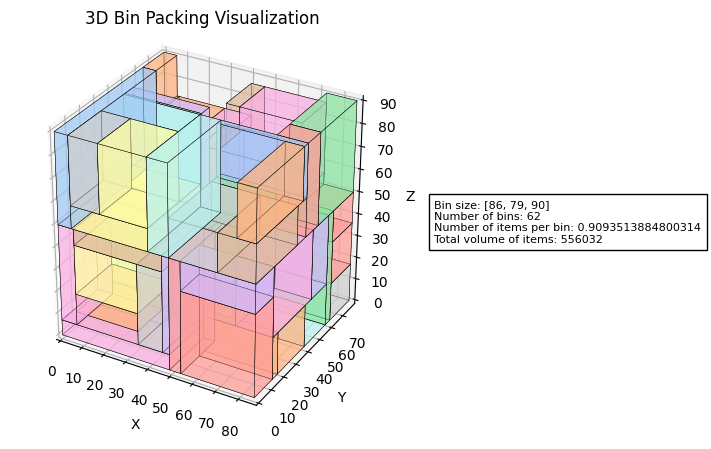

In [3]:
for i in range(1):
    print(df['data'].loc[i], df['bin_size'].loc[i])
    visualize(df['data_cut'].loc[i], df['bin_size'].loc[i])

In [4]:
data_train = df[:50]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
Learner = Trainer(step = 20,
        lr = 0.002, 
        gamma= 0.8, 
        embed_dim = 64,
        hidden = 128,
        env = Env(),
        device= device ,
        dataset= data_train)

Learner.train_step()


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: a Tensor with 3 elements cannot be converted to Scalar

In [ ]:
torch.save(Learner.model.state_dict(),'model_1.pt')

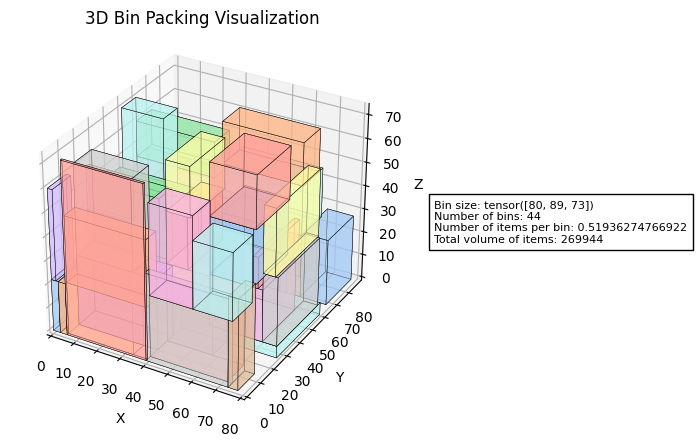

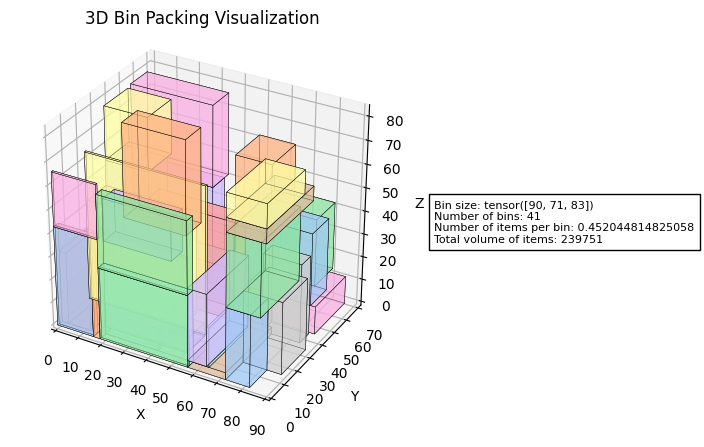

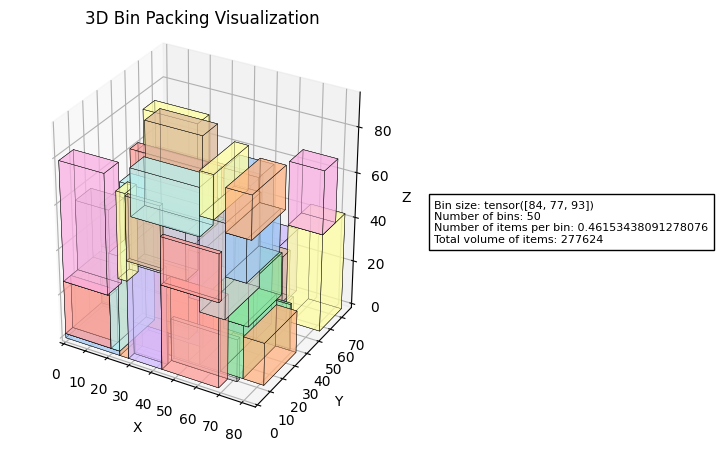

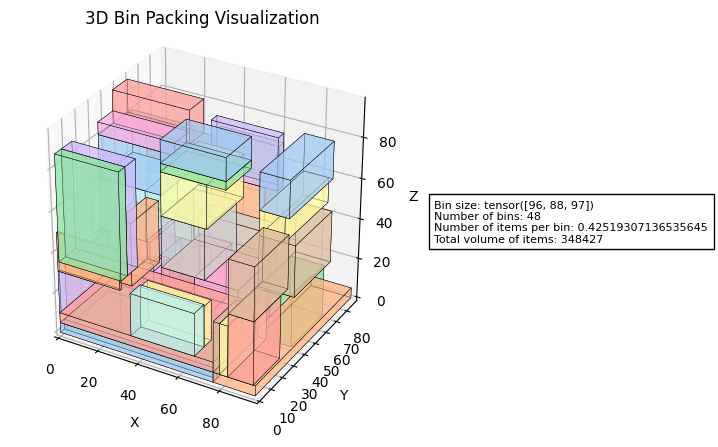

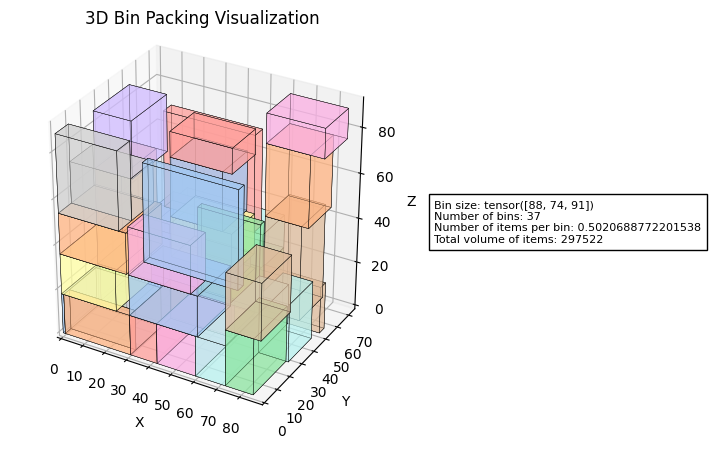

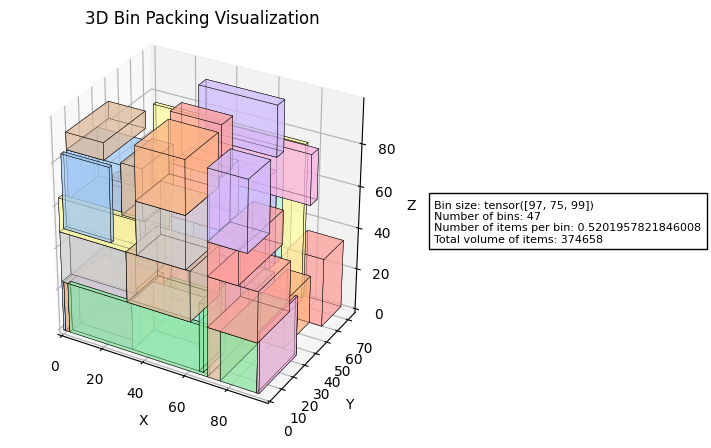

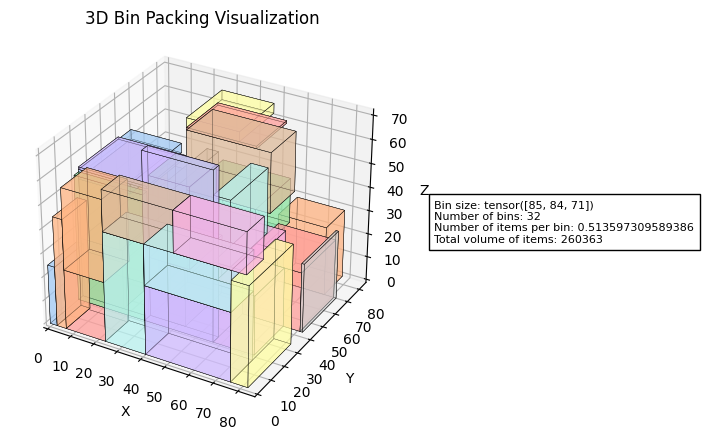

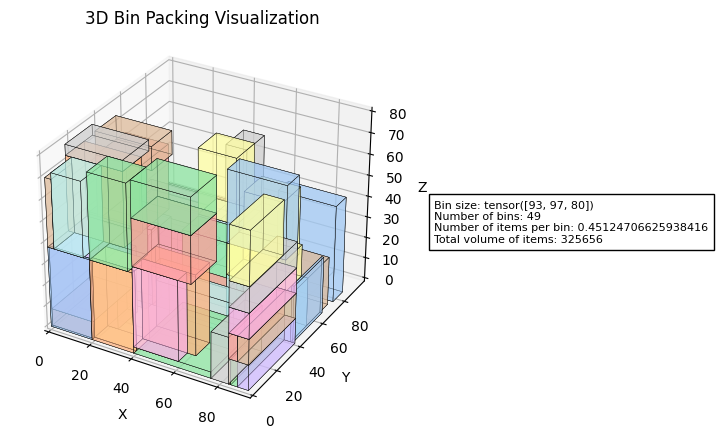

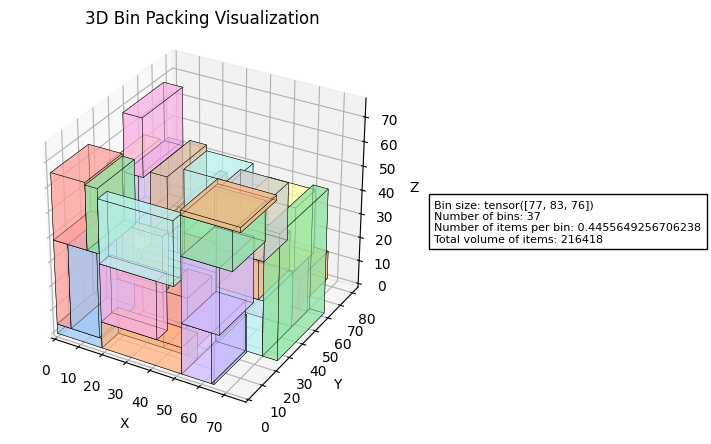

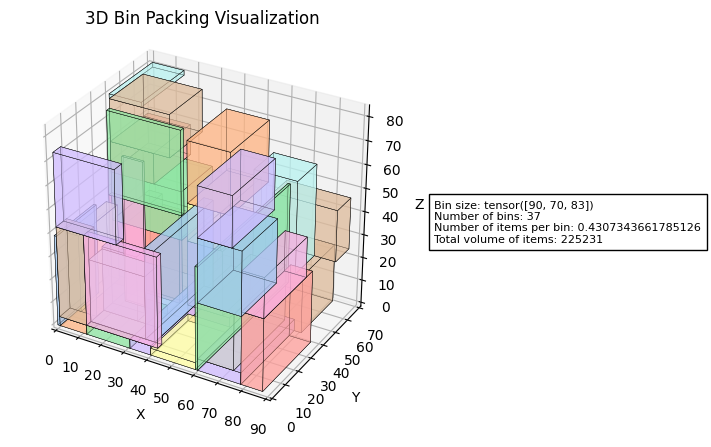

In [ ]:

data_test = df[50:60]
for i in range(len(data_test)):
    items, bin_size = data_test['data'].loc[300+ i], data_test['bin_size'].loc[300 + i]
    items, bin_size = torch.tensor(items), torch.tensor(bin_size)
    Learner.model.env.reset()
    for item in items:
        if Learner.model.env.internal_node == []:
            Learner.model.env.bin_size = bin_size
            Learner.model.env.update_state(item)
            Learner.model.env.packed()
            Learner.model.env.update_graph()
            continue
        Learner.model(item, bin_size)
    
    items_packed = Learner.model.env.internal_node
    check = []
    for item in items_packed:
        check.append((item[:3],item[3:]))
    visualize(check,Learner.model.env.bin_size)